In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [42]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [43]:
data.reset_index(inplace = True)

In [44]:
data


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03 00:00:00+00:00,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04 00:00:00+00:00,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05 00:00:00+00:00,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06 00:00:00+00:00,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09 00:00:00+00:00,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14 00:00:00+00:00,95.076508,95.309998,97.220001,93.940002,95.540001,26452900
2757,2022-12-15 00:00:00+00:00,90.976578,91.199997,94.029999,90.430000,93.540001,28298800
2758,2022-12-16 00:00:00+00:00,90.637405,90.860001,91.750000,90.010002,91.199997,48485500


In [45]:
ma_100_days = data.Close.rolling(100).mean()

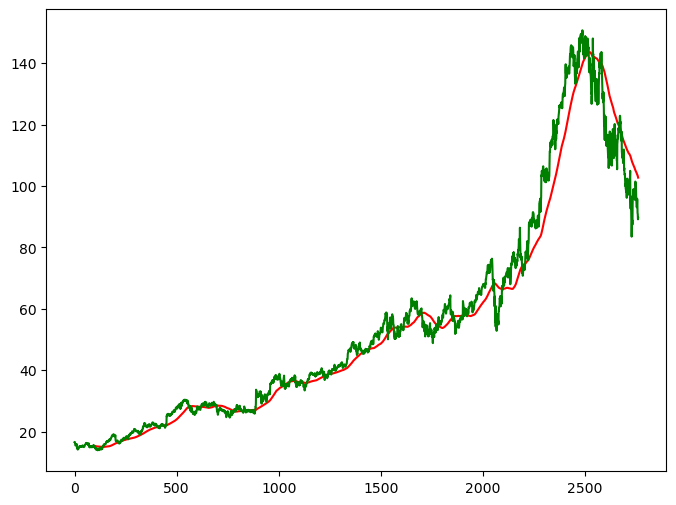

In [46]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close,'g')
plt.show()

In [47]:
ma_200_days = data.Close.rolling(200).mean()

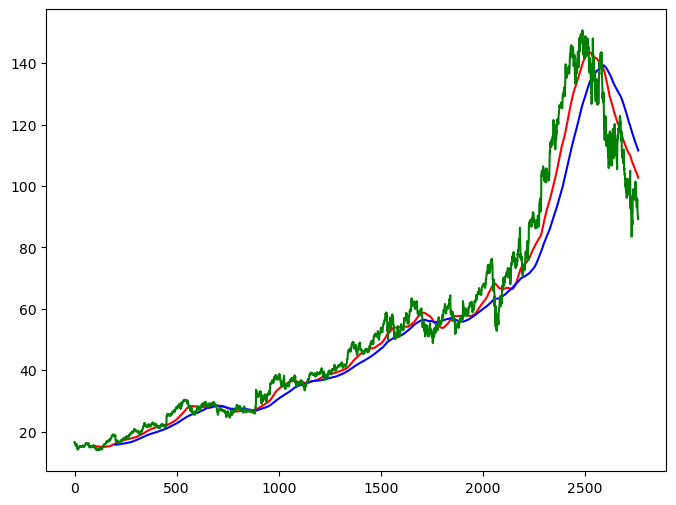

In [48]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')

In [49]:
data.dropna(inplace=True)

In [50]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.90)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.90):len(data)])

In [51]:
data_train.shape[0]

2484

In [52]:
data_test.shape[0]

277

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [54]:
data_train_scale = scaler.fit_transform(data_train)

In [55]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    
    

In [56]:
import numpy as np
from keras.layers import Input, Dense, Dropout, LSTM
from keras.models import Sequential

# Convert x and y to numpy arrays if they are not already
x = np.array(x)
y = np.array(y)

# Define the model
model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))  # Define input shape here

# Adding the LSTM and Dropout layers
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 97s 426ms/step - loss: 0.0443
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 422ms/step - loss: 0.0043
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 426ms/step - loss: 0.0048
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 430ms/step - loss: 0.0033
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 424ms/step - loss: 0.0030
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 427ms/step - loss: 0.0024
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 443ms/step - loss: 0.0028
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 431ms/step - loss: 0.0026
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 435ms/step - loss: 0.0034
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 423ms/step - loss: 0.0024
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 430ms/step - loss: 0.0024
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 428ms/step - loss: 0.0020
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 435ms/step - loss: 0.0017
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 457ms/step - loss: 0.0018
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 

In [58]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [59]:
pas_100_days = data_train.tail(100)

In [61]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)


In [62]:
data_test_scale = scaler.fit_transform(data_test)

In [63]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
    
x,y = np.array(x) , np.array(y)

In [64]:
y_predict = model.predict(x)

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 708ms/step


In [65]:
scale = 1/scaler.scale_

In [67]:
y_predict = y_predict*scale

In [68]:
y = y*scale

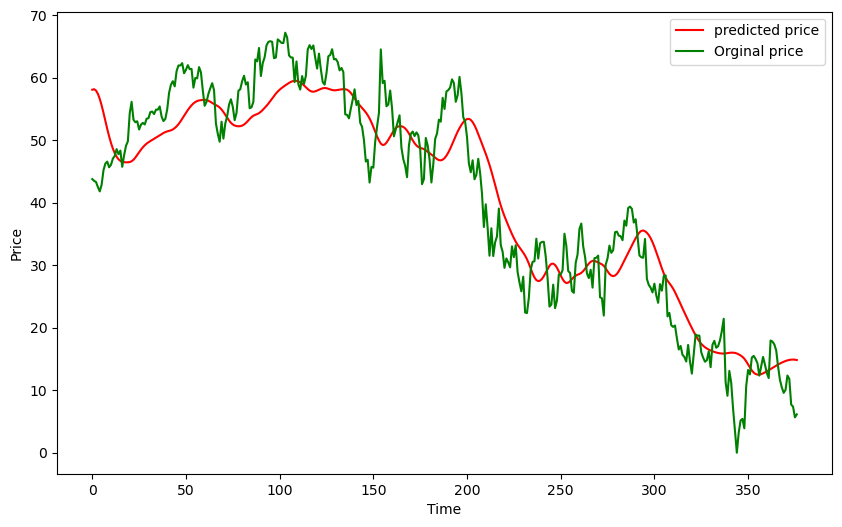

In [69]:
plt.figure(figsize = (10,6))
plt.plot(y_predict, 'r' , label = 'predicted price')
plt.plot(y, 'g' , label  = 'Orginal price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [70]:
model.save('Stock price predictor.keras')